# Juan Burtet - 20103652

# COVID-RS

O objetivo desta tarefa é utilizar e avaliar técnicas de aprendizado de máquina em uma base de dados real. Esta base é originada da Secretaria Estadual de Saúde do RS e contém todos casos registrados de COVID-19 no estado, com informações diversas sobre cada caso, incluindo informações de hospitalização e óbito. 

Este notebook contém o esqueleto básico para carregar os dados e deve ser expandido para explorar metodologias diversas.

# Carregamento dos dados

In [1]:
# Vamos usar o pandas para carregar os dados. Observar que o separador de colunas no arquivo é ponto-e-vírgula.
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 70) # pelo menos 70 coluna serão impressas no dataframe

In [2]:
dados = pd.read_csv("../Datasets/dados_covid_rs.csv", delimiter=';')
dados.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,11/09/2020,08/09/2020,NaN,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,Gestante,SIM,NaN,22/09/2020,NAO INFORMADO,NAO ENCONTRADO,NAO INFORMADO,NaN,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,19/10/2020,05/10/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,19/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,06/10/2020,06/10/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,20/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,05/10/2020,29/09/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,13/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,30/07/2020,26/07/2020,NaN,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,Portador de doenças cromossômicas ou estado de...,NAO,NaN,09/08/2020,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO


In [3]:
# Qual o tamanho da tabela (linhas, colunas)?
dados.shape

(254828, 29)

# Pré-processamento

Os dados raramente vem limpos e prontos para uso. No mínimo, precisamos converter ou adequar tipos e lidar com valores faltantes. Também podemos querer expandir os dados, incluindo novas colunas derivadas dos próprios dados ou de fontes externas.

## Datas

Por exemplo, temos várias colunas que são datas, mas estão representadas como strings. É uma boa ideia converter estas strings para datas reais

In [4]:
dados["DATA_CONFIRMACAO"] = pd.to_datetime(dados["DATA_CONFIRMACAO"], format="%d/%m/%Y")
dados["DATA_SINTOMAS"] = pd.to_datetime(dados["DATA_SINTOMAS"], format="%d/%m/%Y")
dados["DATA_EVOLUCAO"] = pd.to_datetime(dados["DATA_EVOLUCAO"], format="%d/%m/%Y")
dados["DATA_INCLUSAO_OBITO"] = pd.to_datetime(dados["DATA_INCLUSAO_OBITO"], format="%d/%m/%Y")
dados["DATA_EVOLUCAO_ESTIMADA"] = pd.to_datetime(dados["DATA_EVOLUCAO_ESTIMADA"], format="%d/%m/%Y")

dados.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,2020-09-11,2020-09-08,NaT,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,Gestante,SIM,NaT,2020-09-22,NAO INFORMADO,NAO ENCONTRADO,NAO INFORMADO,NaN,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2020-10-19,2020-10-05,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2020-10-19,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,2020-10-06,2020-10-06,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2020-10-20,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,2020-10-05,2020-09-29,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2020-10-13,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,2020-07-30,2020-07-26,NaT,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,Portador de doenças cromossômicas ou estado de...,NAO,NaT,2020-08-09,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO


## Valores Faltantes

Algumas colunas possuem vários "NaN" (Not a Number) ou "NaT" (Not a Time), indicando que são valores faltantes.

Há diversas maneiras de lidar com buracos nos dados, vamos primeiro quantificar o problema contando o número de buracos por coluna.


In [5]:
def quantifica_nans():
  rows = []
  for column in dados.columns:
    row = {'coluna': column, 'nans': dados[column].isnull().sum(), 'frac_nans': dados[column].isnull().sum() / dados.shape[0]}
    rows.append(row)
  res = pd.DataFrame(rows)
  res = res[res.nans>0].sort_values('nans', ascending=False)
  
  return res

In [6]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248874,0.976635
9,DATA_EVOLUCAO,235978,0.926029
17,CONDICOES,214755,0.842745
20,DATA_EVOLUCAO_ESTIMADA,28088,0.110223
27,PAIS_NASCIMENTO,11946,0.046879
22,ETNIA_INDIGENA,11592,0.045490
24,BAIRRO,4966,0.019488
15,DISPNEIA,3033,0.011902
12,FEBRE,20,0.000078
13,TOSSE,20,0.000078


Existe 20 valores `nans` para `FEBRE, TOSSE, GARGANTA` e `OUTROS`. Será verificado se estes valores pertencem as mesmas linhas.

In [8]:
# Percorre nessas colunas, adicionando seus indices em uma lista
# Depois, fica apenas com os valores únicos e imprime a quantidade

indexes = []
for column in ['FEBRE', 'TOSSE', 'GARGANTA', 'OUTROS']:
  indexes += list(dados[dados['FEBRE'].isna()].index)
  
indexes = set(indexes)
len(indexes)

20

Pelo resultado da célula anterior, foi verificado que as 20 linhas são as mesmas. Então, iremos dropar essas linhas do conjunto de dados.

In [9]:
# Remove os valores nans das colunas inseridas

dados = dados.dropna(subset=['FEBRE', 'TOSSE', 'GARGANTA', 'OUTROS'])

Vamos verificar o comportamento do `nans` novamente

In [10]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248857,0.976645
9,DATA_EVOLUCAO,235961,0.926035
17,CONDICOES,214738,0.842744
20,DATA_EVOLUCAO_ESTIMADA,28085,0.110220
27,PAIS_NASCIMENTO,11932,0.046827
22,ETNIA_INDIGENA,11578,0.045438
24,BAIRRO,4949,0.019422
15,DISPNEIA,3013,0.011825


Como pode ser visto, `FONTE_INFORMAÇÃO` acabou saindo do conjunto de `nans`, pois estava incluido no nas 20 linhas retiradas.

as colunas `PAIS_NASCIMENTO, ETNIA_INDIGENA, BAIRRO` e `DISPNEIA` possuem poucos valores `nans` avaliando sua fração, mas caso fosse retirado todas essas linhas, seria perdido uma quantidade consideravel de informação.

Como possível solução, será adicionado um valor novo aos valores `nans`, indicando que seu valor é `NÃO INFORMADO`.

Mas antes disso, é interessante verificar se esse valor `NÃO INFORMADO` (ou algo próximo) já existe nessas colunas. Em caso positivo, pode deixar os valores `nans` com este valor próximo.

#### PAIS_NASCIMENTO

In [11]:
# Com o value_counts, podemos avaliar os valor encontrados na coluna e suas quantidades

dados['PAIS_NASCIMENTO'].value_counts().head() # pode retirar o head para ver todos os valores

BRASIL                232474
NAO ENCONTRADO          8700
REPUBLICA DO HAITI      1047
VENEZUELA                194
SENEGAL                   85
Name: PAIS_NASCIMENTO, dtype: int64

Existe o valor `NAO ENCONTRADO` nessa coluna e poderiamos utiliza-lo para completar os `nans`.

Mas devido a grande quantidade de países, foi decidido dropar esta coluna

In [12]:
dados = dados.drop(columns=['PAIS_NASCIMENTO'])

#### ETNIA_INDIGENA

In [13]:
dados['ETNIA_INDIGENA'].value_counts()

NAO ENCONTRADO                                                     242344
KAINGANG (CAINGANGUE)                                                 766
NÃO INFORMADO                                                          57
GUARANI M BYA                                                          22
GUARANI                                                                10
AIKANA (AIKANA, MAS SAKA,TUBARAO)                                       6
GUARANI KAIOWA (PAI TAVYTERA)                                           4
AJURU                                                                   4
ACONA (WAKONAS, NACONAS, JAKONA, ACORANES)                              3
GUARANI NANDEVA (AVAKATUETE, CHIRIPA, NHANDEWA, AVA GUARANI)            2
AKUNSU (AKUNT SU)                                                       2
ACONA (WAKONAS, NACONAS, JAKONA, ACORAÂ-NES)                            2
KANINDE                                                                 1
GUARANIÂ  NANDEVAÂ  (AVAKATUETE, CHIRI

De acordo com informações do Censo de 2010 para o Estado do Rio Grande do Sul, apenas 0.3% da população do Estado se considera "indígena" [1].

 Se avaliarmos os dados, é verificado que os valores diferentes de `NAO ENCONTRADO` acabam tendo uma quantidade muito pequena em comparação a este valor. Com isso, é possivel inferir que o valor `NAO ENCONTRADO` pode ser utilizado para representar pessoas não indígenas.

Mas devido a pouca quantidade desses valores diferentes, foi decidido dropar esta coluna.

In [14]:
dados = dados.drop(columns=['ETNIA_INDIGENA'])

#### BAIRRO

In [15]:
# BAIRRO possui 11631 valores possíveis, o que dificulta sua visualização.
# Iremos visualizar todas entradas que comecem com 'NAO'

sorted([b for b in dados['BAIRRO'].value_counts().index if b[:3] == 'NAO'])

['NAO CONSTA',
 'NAO DEIXOU',
 'NAO INF',
 'NAO INF.',
 'NAO INFORMADO',
 'NAO INFORMOU']

É possível visualizar que não existe um padrão de escrita para dados não informados. Então, foi decidido não trabalhar com essa coluna.

In [16]:
dados = dados.drop(columns=['BAIRRO'])

#### DISPNEIA

In [17]:
dados['DISPNEIA'].value_counts()

NAO    209578
SIM     42217
Name: DISPNEIA, dtype: int64

`DISPNEIA` não possui nenhum valor parecido com `NAO ENCONTRADO`. Então, será criado este valor para os `nans`

In [18]:
dados['DISPNEIA'] = dados['DISPNEIA'].fillna("NAO ENCONTRADO")

Faremos novamente as quantificacoes dos `nans`

In [19]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248857,0.976645
9,DATA_EVOLUCAO,235961,0.926035
17,CONDICOES,214738,0.842744
20,DATA_EVOLUCAO_ESTIMADA,28085,0.110220


Ainda temos 4 colunas com valores nulos. 3 delas são valores de DATA, e pode indicar que não houve uma ocorrência deste atributo. (Ainda precisaria ser validado)

Com isso, ainda existe a coluna `CONDICOES` para ser analisada

#### CONDICOES

In [20]:
dados['CONDICOES'].value_counts()

Doenças cardíacas crônicas                                                                                  8919
Doenças respiratórias crônicas descompensadas                                                               4109
Diabetes                                                                                                    3160
Outros                                                                                                      2156
Doença Cardiovascular Crônica                                                                               2051
                                                                                                            ... 
Doenças cardíacas crônicas, Doenças respiratórias crônicas descompensadas, Imunossupressão                     1
Puérpera, Imunodeficiência                                                                                     1
Doença Cardiovascular Crônica, Doença Hematológica Crônica, Doença Hepática Crônic              

Existe 698 valores encontrados em `CONDICOES`, mas pode ser verificado que existe multiplos valores em uma coluna, sendo dividos por vírgula.

É possivel avaliar os valores de forma única, dividindo pela virgula e verificando a quantidade de `CONDICOES` únicas encontradas.

In [21]:
# É importado o defaultdict da biblioteca collections.
# O defaultdic funciona igual o dicionário, mas adiciona um valor fixo caso a chave não exista ao ser consultada
# Neste caso, o valor fixo é 0 (zero)
from collections import defaultdict
condicoes_dict = defaultdict(int)

# É importado o regex, para trabalhar com as strings
import re

# Adiciona a string 'nan' nos valores nulos
# Percorre todos os valores
for value in dados['CONDICOES'].fillna('nan').values:
  
  # Divide palavras por ',' que não estejam dentro dos parenteses
  for s in re.split(r',\s*(?![^()]*\))', value):
    condicoes_dict[s.strip()] += 1

len(condicoes_dict.keys())

34

Foi encontrado 34 valores diferentes na coluna CONDICOES após a filtragem por vírgulas. Vamos verificar todas elas em ordem alfabética.

In [22]:
sorted(list(condicoes_dict.items()), key=lambda x: x[0])

[('Asm', 3),
 ('Asma', 1112),
 ('Diabetes', 6449),
 ('Diabetes mellitu', 18),
 ('Diabetes mellitus', 5793),
 ('Doença Cardiovascular Crônica', 8106),
 ('Doença Hematológica Crônic', 41),
 ('Doença Hematológica Crônica', 212),
 ('Doença Hepática Crônic', 3),
 ('Doença Hepática Crônica', 378),
 ('Doença Neurológica Crônic', 10),
 ('Doença Neurológica Crônica', 1613),
 ('Doença Renal Crônic', 13),
 ('Doença Renal Crônica', 1177),
 ('Doenças cardíacas crônicas', 12854),
 ('Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)', 623),
 ('Doenças respiratórias crônicas descompensadas', 5239),
 ('Gestante', 928),
 ('Gestante de alto risco', 33),
 ('Imunodeficiênci', 21),
 ('Imunodeficiência', 1067),
 ('Imunossupressão', 1335),
 ('Obesidad', 14),
 ('Obesidade', 3120),
 ('Outra Pneumatopatia Crônic', 6),
 ('Outra Pneumatopatia Crônica', 1643),
 ('Outro', 124),
 ('Outros', 7615),
 ('Pneumatopatia Crônica', 97),
 ('Portador de doenças cromossômicas ou estado de fragilidade imunológica',
 

Existe muitos valores que representam a mesma coisa mas possuem uma letra faltando no fim. Para isso, será criado uma lista de tuplas para poder ser feito a conversão corretamente.

In [23]:
# É criado uma lista indicando qual será a conversão
conversao_condicoes = []
condicoes = sorted(list(condicoes_dict.keys()))

# é passado por caso palavra, verificando se a próxima palavra
# menos o ultimo caracter é igual a palavra atual (confuso)
for i in range(len(condicoes) - 1):
  if condicoes[i] != condicoes[i+1][:-1]:
    conversao_condicoes.append((condicoes[i], condicoes[i]))
  else:
    conversao_condicoes.append((condicoes[i], condicoes[i+1]))

# adiciona o nan
conversao_condicoes.append(('nan', 'nan'))

conversao_condicoes

[('Asm', 'Asma'),
 ('Asma', 'Asma'),
 ('Diabetes', 'Diabetes'),
 ('Diabetes mellitu', 'Diabetes mellitus'),
 ('Diabetes mellitus', 'Diabetes mellitus'),
 ('Doença Cardiovascular Crônica', 'Doença Cardiovascular Crônica'),
 ('Doença Hematológica Crônic', 'Doença Hematológica Crônica'),
 ('Doença Hematológica Crônica', 'Doença Hematológica Crônica'),
 ('Doença Hepática Crônic', 'Doença Hepática Crônica'),
 ('Doença Hepática Crônica', 'Doença Hepática Crônica'),
 ('Doença Neurológica Crônic', 'Doença Neurológica Crônica'),
 ('Doença Neurológica Crônica', 'Doença Neurológica Crônica'),
 ('Doença Renal Crônic', 'Doença Renal Crônica'),
 ('Doença Renal Crônica', 'Doença Renal Crônica'),
 ('Doenças cardíacas crônicas', 'Doenças cardíacas crônicas'),
 ('Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)',
  'Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)'),
 ('Doenças respiratórias crônicas descompensadas',
  'Doenças respiratórias crônicas descompensadas'),
 ('Gestan

In [24]:
# Função que retorna o valor utilizando conversao_condicoes
def convert_cond(value):
  for a, b in conversao_condicoes:
    if a == value:
      return b
  else:
    return None

Agora, podemos verificar quantos valores possiveis existem pegando os resultados das conversões

In [25]:
condicoes_possiveis = list(set([s for _,s in conversao_condicoes]))
len(condicoes_possiveis)

24

Então, uma possível solução para essa coluna é fazer uma codificação One Hot, onde cada coluna poderia indicar a presença dessas `CONDICOES`

In [26]:
# A classe LabelBinarizer do ScikitLearn será usada nessa tarefa
from sklearn.preprocessing import LabelBinarizer

# Primeiramente, resetamos os indices do dataframe
# pois retiramos algumas linhas dele
dados.index = pd.RangeIndex(len(dados.index))


# é criado um codificador com os valores de conversao_condicoes
cod = LabelBinarizer()
cod.fit(condicoes_possiveis)

# Adiciona a string 'nan' nos valores nulos
# Percorre todos os valores
one_hot_values = []
for value in dados['CONDICOES'].fillna('nan').values:
  
  # Inicializa o vetor com tudo zero
  one_hot_value = np.zeros((1,24))
  
  # Divide palavras por ',' que não estejam dentro dos parenteses
  for s in re.split(r',\s*(?![^()]*\))', value):
    
    # Cria o one-hot do valor e adiciona ao array np
    valor = convert_cond(s.strip())
    one_hot_value += cod.transform([valor])
  
  # Adiciona a lista de one_hot
  one_hot_values.append(one_hot_value)
    

# Transforma em DataFrame a informação e renomeia as colunas
one_hot_values = np.concatenate(one_hot_values)
onehot = pd.DataFrame(one_hot_values)
onehot.columns = ['CONDICAO=' + column for column in cod.classes_]

# Juntamos de volta com os dados originais e removemos a coluna CONDICOES
dados = pd.concat([dados, onehot], axis=1).drop(['CONDICOES'], axis=1)
dados

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,PROFISSIONAL_SAUDE,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PES_PRIV_LIBERDADE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Outros,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down,CONDICAO=nan
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,2020-09-11,2020-09-08,NaT,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,SIM,NaT,2020-09-22,NAO INFORMADO,NAO INFORMADO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2020-10-19,2020-10-05,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2020-10-19,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,2020-10-06,2020-10-06,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2020-10-20,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,2020-10-05,2020-09-29,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2020-10-13,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,2020-07-30,2020-07-26,NaT,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,NaT,2020-08-09,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254803,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,80 e mais,TESTE RÁPIDO,2020-08-16,2020-08-16,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NaT,2020-08-30,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254804,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,20 a 29,TESTE RÁPIDO,2020-08-20,2020-08-20,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NaT,2020-09-03,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254805,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,50 a 59,RT-PCR,2020-08-07,2020-08-02,NaT,RECUPERADO,NAO,SIM,NAO,NAO,NAO,SIM,NAO,NaT,2020-08-16,PRETA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254806,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,50 a 59,RT-PCR,2020-08-10,2020-08-02,NaT,RECUPERADO,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NaT,2020-08-16,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Com isso, ficamos apenas com valores nulos nas colunas de DATA

In [27]:
quantifica_nans()

,coluna,nans,frac_nans
18,DATA_INCLUSAO_OBITO,248857,0.976645
9,DATA_EVOLUCAO,235961,0.926035
19,DATA_EVOLUCAO_ESTIMADA,28085,0.110220


## Exclusão de Colunas

Neste momento, podemos avaliar algumas colunas que podem ser excluidas dos dados, por não ter informação relevante para um modelo

In [28]:
# Essas colunas serão excluidas
eliminate_columns = [
  'COD_IBGE', 
  'MUNICIPIO',
  'COD_REGIAO_COVID',
  'REGIAO_COVID',
  'CRITERIO',
  'FONTE_INFORMACAO',
  'PES_PRIV_LIBERDADE',
  'EVOLUCAO',
  'OUTROS',
  'HOSPITALIZACAO_SRAG',
  'DATA_INCLUSAO_OBITO',
  'DATA_EVOLUCAO',
  'DATA_EVOLUCAO_ESTIMADA',
  'DATA_CONFIRMACAO',
  'DATA_SINTOMAS',
  'CONDICAO=Gestante',
  'CONDICAO=Outros',
  'CONDICAO=nan',
]

# As datas não serão utilizadas pelo modelo
# a coluna OUTRAS não parece indica nenhuma informação (pelo nome)
# a CONDICAO=Gestante foi retirada pois já existe uma coluna GESTANTE
# a CONDICAO=Outros foi retirada pois não parece indicar nenhuma informação (pelo nome)
# a CONDICAO=nan foi retirada pois é a indicação que não teve nenhuma condição

dados = dados.drop(eliminate_columns, axis=1)

## Avaliando as colunas restantes

Vamos avaliar as colunas restantes

In [29]:
dados

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,GESTANTE,RACA_COR,PROFISSIONAL_SAUDE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down
0,Feminino,20 a 29,NAO,SIM,NAO,SIM,NAO,SIM,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Feminino,50 a 59,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Masculino,15 a 19,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Feminino,40 a 49,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feminino,30 a 39,NAO,NAO,SIM,SIM,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254803,Feminino,80 e mais,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254804,Masculino,20 a 29,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254805,Masculino,50 a 59,NAO,SIM,NAO,NAO,NAO,NAO,PRETA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254806,Masculino,50 a 59,NAO,SIM,NAO,SIM,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Podemos dividir em 3 grupos: 

    - O primeiro precisa apenar transformar SIM e NAO em 1 e 0. 
    - O segundo precisa trabalhar com codificação one-hot para organizar os seus valores.
    - O terceiro pode indicar ordem (FAIXAETARIA)

### Binarização (essa palavra existe?)

Primeiro, fazemos a transformação nas colunas desejadas

In [30]:
binary_columns = [
  'HOSPITALIZADO',
  'FEBRE',
  'TOSSE',
  'GARGANTA',
  'GESTANTE',
] 

for column in binary_columns:
  dados[column] = dados[column].replace({'NAO': 0, 'SIM': 1})  

Em seguida, adicionares 1 caso a pessoa seja um Profissional de Saúde e 0 em caso negativo (ou não informado)

In [31]:
dados["PROFISSIONAL_SAUDE"] = dados["PROFISSIONAL_SAUDE"].apply(lambda x: 1 if x == 'SIM' else 0)

### Codificação ONE-HOT

In [32]:
# Fazer o one hot dessas colunas
one_hot_columns = [
  'DISPNEIA',
  'RACA_COR',
]

for column in one_hot_columns:
  
  # Cria o codificador para essa coluna
  cod = LabelBinarizer()
  cod.fit(dados[column])
  
  # Transforma os atributos em vetor one_hot
  atributo_transformado = cod.transform(dados[column])
  
  # Cria um dataframe e modifica as coluans
  onehot = pd.DataFrame(atributo_transformado)
  onehot.columns = [column + '=' + c for c in cod.classes_]
  
  # Concatena aos dados
  dados = pd.concat([dados, onehot], axis=1).drop([column], axis=1)

Criar uma coluna para indicação de cada sexo, para não ocorrer ordem

In [33]:
dados['SEXO=MASCULINO'] = dados['SEXO'].apply(lambda x: 1 if x == 'Masculino' else 0)
dados['SEXO=FEMININO'] = dados['SEXO'].apply(lambda x: 1 if x == 'Feminino' else 0)
dados = dados.drop(columns=['SEXO'])

### Categóricas Ordinais

A única coluna com valores categóricos é a FAIXAETARIA. Vamos analisa-la.

In [34]:
dados['FAIXAETARIA'].value_counts()

30 a 39      57708
40 a 49      47259
20 a 29      46547
50 a 59      38006
60 a 69      23414
70 a 79      11706
15 a 19       9482
80 e mais     6763
10 a 14       4715
05 a 09       4421
01 a 04       3798
<1             989
Name: FAIXAETARIA, dtype: int64

Com estes valores, podemos fazer um ordenamento, da menor faixa etária até a maior.

In [35]:
# Faixas etarias ordenadas
faixa_etaria = {
  '<1': 0,
  '01 a 04': 1,  
  '05 a 09': 2,    
  '10 a 14': 3,
  '15 a 19': 4,
  '20 a 29': 5,
  '30 a 39': 6,
  '40 a 49': 7,
  '50 a 59': 8, 
  '60 a 69': 9,
  '70 a 79': 10,      
  '80 e mais': 11,
}

# Damos replace nos valores
dados['FAIXAETARIA'] = dados['FAIXAETARIA'].replace(faixa_etaria)               

Por fim, temos os dados totalmente processados para o treinamento de um modelo.

In [36]:
dados = dados.astype(int)
dados

,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,GESTANTE,PROFISSIONAL_SAUDE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down,DISPNEIA=NAO,DISPNEIA=NAO ENCONTRADO,DISPNEIA=SIM,RACA_COR=AMARELA,RACA_COR=BRANCA,RACA_COR=INDIGENA,RACA_COR=NAO INFORMADO,RACA_COR=PARDA,RACA_COR=PRETA,SEXO=MASCULINO,SEXO=FEMININO
0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254803,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
254804,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
254805,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
254806,8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


# Predição da Variável HOSPITALIZADO

Para esta tarefa, tentaremos prever a variável `HOSPITALIZADO` 

Primeiramente, devemos dividir os dados de Entrada e Saída. (Chamaremos de X e y, respectivamente)

In [37]:
X = dados.drop(columns=['HOSPITALIZADO'])
y = dados['HOSPITALIZADO']

Vamos avaliar a distribuição de y

In [38]:
y.value_counts()

0    234282
1     20526
Name: HOSPITALIZADO, dtype: int64

Os valores não estão balanceados, então verificar a acurácia do modelo não parece um bom parametro de desempenho.

Para divisão treino/teste, será dividido da maneira 80/20.

Como a distribuição não é balanceada, usaremos o argumento stratify da função train_test_split do ScikitLearn para manter uma divisão balanceada.

In [39]:
# Função train_test_split do ScikitLearn
from sklearn.model_selection import train_test_split

# Dividido entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Alguns pacotes necessários

In [40]:
from sklearn import tree # Árvore de Decisão
from sklearn.metrics import classification_report # Classificação dos resultados do modelo
from sklearn.metrics import confusion_matrix # Matriz de Confusão
import seaborn as sns # Usado pra plotar a matriz de confusão
from sklearn.ensemble import RandomForestClassifier # Random Forest

### Árvores de Decisão

Utilizaremos as Árvores de Decisão pois são modelos simples e bem possível de interpreta-los

In [41]:
# Cria o classificador e treina com os dados de treino 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [42]:
# Faz a previsão dos dados
y_predict = clf.predict(X_test)

Com o modelo treinado e os dados previstos, podemos verificar o desempenho dele em comparação aos dados corretos

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     46857
           1       0.94      0.67      0.78      4105

    accuracy                           0.97     50962
   macro avg       0.95      0.83      0.88     50962
weighted avg       0.97      0.97      0.97     50962



O modelo acabou tendo 97% de acurácia aos dados de teste, mas precisamos lembrar que os dados não estão balanceados. Para isso, podemos avaliar o precision e recall de valor 1 (Hospitalizado).

Uma forma mais visual de avaliar o desempenho do modelo é através da Matriz de Confusão

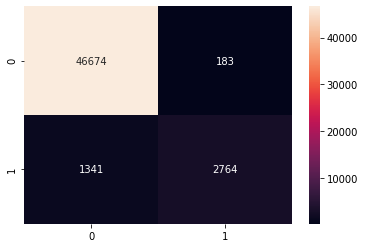

In [45]:
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print()

O modelo parece ter aprendido bem quando uma pessoa não vai ser hospitalizada, pois acabou 'hospitalizando' uma pessoa que não precisa ser hospitalizada apenas 183 vezes (comparado às 46674 vezes corretas)

É possível verificar que houve bastante erros aos confirmar que era hospitalizado. Um dos motivos é o grande desbalanceamento de dados, mas apesar de tudo, ele acabou acertando mais do que errou, o que é uma vitória!

E avaliando o comportamento destes dados, é possível avaliar que a quantidade de pessoas que precisam de hospitalização para COVID é pequena em comparação as que não precisam.

## Referências

__[1]__ - http://carta.fee.tche.br/article/caracteristicas-da-populacao-indigena-no-rio-grande-do-sul/